### Análise de impacto de drift na predição

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
df_criterio_div_drift_results = pd.read_csv("./drift_results/Publico_Privado/div_criterio_pub_pub_14-17_drift_result.csv")

columns_drop = ['Privada CFL', 'Privada SFL', 'Pública Federal', 'Pública Estadual', 'Pública Municipal']
df_criterio_div_drift_results = df_criterio_div_drift_results[~df_criterio_div_drift_results['Alternativa'].isin(columns_drop)]

In [19]:
feature_importances = pd.read_csv(f'./feature_importances/Publico_Privado/feat_importances_publicos_14-17.csv')

In [20]:
set(df_criterio_div_drift_results["Alternativa"].values) - set(feature_importances["Alternativas"].values)

set()

In [69]:
atributos_categoricos = ['Tipo_Escola_EM', 'UF_Ensino_Medio', 'Modalidade_EM', 'Sexo', 'Cor_Raca', 'Estado_Civil', 'Nl_Pai', 'Nl_Mae', 'Renda', 
                             'Situacao_Financeira', 'Moradia', 'Qtde_Pessoas', 'Politica_de_Ingresso', 'Situacao_Trabalho', 'Bolsa_de_Estudos', 'Qtde_Livros', 
                             'Horas_de_Estudo','Formacao','Plano_de_Ensino','Disponibilidade_Professores',
                             'Dominio_Professores','Condicao_Salas','Condicao_Praticas']

dict_grouped_drift_feat_importance = {quest:[] for quest in atributos_categoricos}

for quest in atributos_categoricos:
    drift_results_quest = df_criterio_div_drift_results[df_criterio_div_drift_results["Alternativa"].str.contains(quest)].reset_index(drop=True)
    feat_importances_quest = feature_importances[feature_importances["Alternativas"].str.contains(quest)].reset_index(drop=True)
    
    num_rows = len(drift_results_quest)
    
    for ith_row in range(num_rows):
        drift_data = drift_results_quest.iloc[ith_row]
        feat_importance_data = feature_importances[feature_importances["Alternativas"] == drift_data["Alternativa"]].values[0][1]
        prediction_impact = drift_data["Drift_Score"] * feat_importance_data
        dict_grouped_drift_feat_importance[quest].append((drift_data["Alternativa"], drift_data["Drift_Score"], drift_data["Detected"], feat_importance_data, prediction_impact))

In [70]:
list_questoes = dict_grouped_drift_feat_importance.keys()

In [71]:
result_prediction_impact_questao = []

for questao in list_questoes:
    num_alternativas = len(dict_grouped_drift_feat_importance[questao])
    list_prediction_impact = [alterativa[4] for alterativa in dict_grouped_drift_feat_importance[questao]]
    
    media = sum(list_prediction_impact)/float(num_alternativas)
    
    result_prediction_impact_questao.append((questao, media))

In [72]:
sorted(result_prediction_impact_questao, key=lambda quest:quest[1], reverse=True)

[('Bolsa_de_Estudos', 0.0003112153534724338),
 ('Politica_de_Ingresso', 0.00013986695171437695),
 ('Plano_de_Ensino', 5.843741633747792e-05),
 ('Tipo_Escola_EM', 5.624067760494262e-05),
 ('Qtde_Livros', 4.7617974397215185e-05),
 ('Horas_de_Estudo', 3.61954793555025e-05),
 ('Estado_Civil', 2.261893054030305e-05),
 ('Disponibilidade_Professores', 4.397575221141151e-06),
 ('Qtde_Pessoas', -5.568395191238812e-06),
 ('UF_Ensino_Medio', -6.0557769599851735e-06),
 ('Moradia', -2.150678003011433e-05),
 ('Nl_Pai', -2.805850659036316e-05),
 ('Situacao_Financeira', -5.2745633157951074e-05),
 ('Nl_Mae', -5.486485600485134e-05),
 ('Dominio_Professores', -6.011203265092173e-05),
 ('Condicao_Praticas', -8.759499964486046e-05),
 ('Modalidade_EM', -8.77309085544747e-05),
 ('Formacao', -0.0001244886585819893),
 ('Cor_Raca', -0.00012479130713735184),
 ('Situacao_Trabalho', -0.00012955670474847897),
 ('Condicao_Salas', -0.00015361053287219704),
 ('Sexo', -0.00025536669453140443),
 ('Renda', -0.00029742794

In [77]:
dict_grouped_drift_feat_importance["Bolsa_de_Estudos"]

[('nulos_Bolsa_de_Estudos',
  0.0540991902834008,
  False,
  0.0012145748987854,
  6.570751856283362e-05),
 ('Sim_Bolsa_de_Estudos',
  0.0705566801619433,
  False,
  0.008906882591093,
  0.0006284400662197296),
 ('Não_Bolsa_de_Estudos',
  0.0375910931174089,
  False,
  0.0052631578947368,
  0.00019784785851267685),
 ('Não se aplica_Bolsa_de_Estudos',
  0.0726315789473684,
  False,
  0.0048582995951416,
  0.000352865970594495)]

In [74]:
conjunt_treino = pd.read_csv(f'./criterios_divisao/Publico_Privado/cursos_grad_publicos_2014.csv')
conjunt_teste = pd.read_csv(f'./criterios_divisao/Publico_Privado/cursos_grad_publicos_2017.csv')

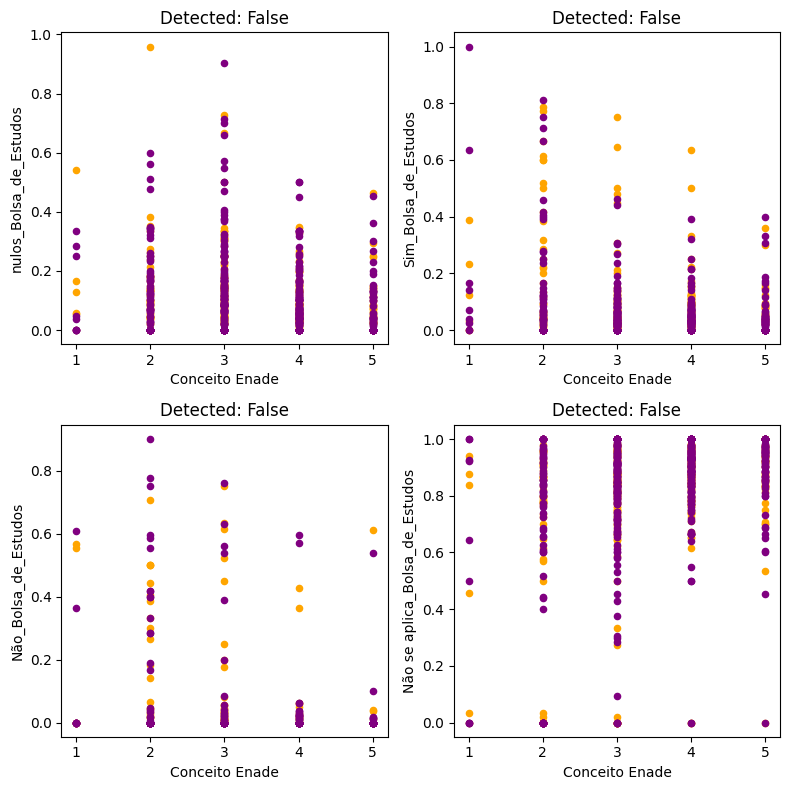

In [79]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
axes = axes.flatten()

list_alternativas = [(alternativa[0], alternativa[2]) for alternativa in dict_grouped_drift_feat_importance["Bolsa_de_Estudos"]]

for i, alternativa in enumerate(list_alternativas):
    
    conjunt_treino.plot.scatter(ax=axes[i], 
                                x='Nota_Conceito_Faixa',
                                y=alternativa[0],
                                c='Orange')
    
    conjunt_teste.plot.scatter(ax=axes[i],
                               x='Nota_Conceito_Faixa',
                               y=alternativa[0],
                               c='Purple')
    
    axes[i].set_title(f'Detected: {alternativa[1]}')
    axes[i].set_xlabel("Conceito Enade") 
    axes[i].set_ylabel(alternativa[0]) 

plt.tight_layout()

plt.show()

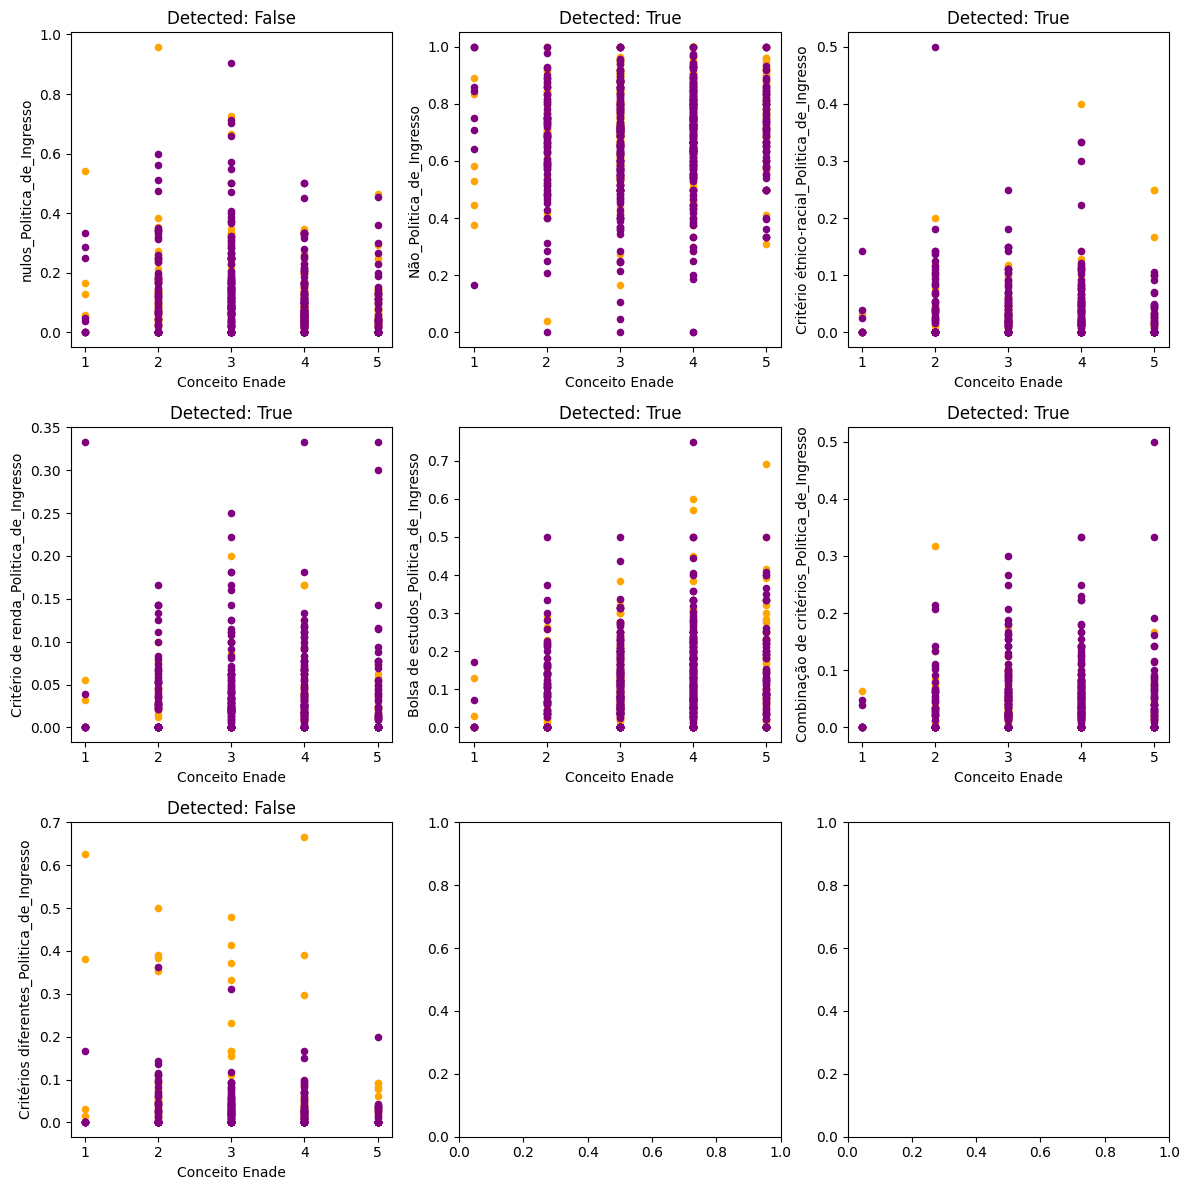

In [81]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
axes = axes.flatten()

list_alternativas = [(alternativa[0], alternativa[2]) for alternativa in dict_grouped_drift_feat_importance["Politica_de_Ingresso"]]

for i, alternativa in enumerate(list_alternativas):
    
    conjunt_treino.plot.scatter(ax=axes[i], 
                                x='Nota_Conceito_Faixa',
                                y=alternativa[0],
                                c='Orange')
    
    conjunt_teste.plot.scatter(ax=axes[i],
                               x='Nota_Conceito_Faixa',
                               y=alternativa[0],
                               c='Purple')
    
    axes[i].set_title(f'Detected: {alternativa[1]}')
    axes[i].set_xlabel("Conceito Enade") 
    axes[i].set_ylabel(alternativa[0]) 

plt.tight_layout()

plt.show()